Multi-LayerPerceptron

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
train = pd.read_csv("train70_augmented.csv", nrows=2000000)

In [3]:
train = pd.DataFrame(train)

In [4]:
print(train['target'].value_counts())

target
legitimate    999929
bruteforce    200574
malformed     200432
slowite       200121
flood         199731
dos           199213
Name: count, dtype: int64


In [5]:
rows = []

for i in train.index:
    if train['target'][i] == 'legitimate':
        rows.append(i)

In [6]:
rows = rows[:5600000]

train = train.drop(rows)

print(train['target'].value_counts())

target
bruteforce    200574
malformed     200432
slowite       200121
flood         199731
dos           199213
Name: count, dtype: int64


In [7]:
# pre processamento de dados

features = train.iloc[:,:-1]
target = train['target']

print(features.shape)

(1000071, 33)


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label = LabelEncoder()

In [10]:
label.fit(target)

LabelEncoder()

In [11]:
list(label.classes_)

['bruteforce', 'dos', 'flood', 'malformed', 'slowite']

In [12]:
target = label.transform(target)

In [13]:
# ajuste de dados 

# features com valores irrelevantes para o treinamento

columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos', 
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag', 
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 
           'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg']

features = features.drop(columns, axis=1)

print(features.shape)

(1000071, 19)


In [14]:
# ajuste de variáveis categóricas

features = pd.get_dummies(features)

print(features.shape)
print(features.keys())

(1000071, 44)
Index(['tcp.time_delta', 'tcp.len', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname',
       'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.qos', 'mqtt.ver', 'tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.conflags_0',
       'mqtt.conflags_0x00000002', 'mqtt.conflags_0x00000082',
       'mqtt.conflags_0x000000c2', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090'

In [15]:
col = ['tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090',
       'mqtt.hdrflags_0x000000c0', 'mqtt.hdrflags_0x000000d0',
       'mqtt.hdrflags_0x000000e0', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [16]:
features[col] = features[col].replace({True: 1, False: 0})

In [17]:
features = features.values

print(type(features))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
# embaralhamento de dados

from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [20]:
# Multi-Layer Perceptron

from sklearn.neural_network import MLPClassifier

In [21]:
clf = MLPClassifier(activation='relu', batch_size=1000, max_iter=130, solver='adam', alpha=0.00001, random_state=0)

In [22]:
clf.fit(X_train, y_train)

/home/e-controls/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-05, batch_size=1000, max_iter=130, random_state=0)

In [23]:
# accuracy

print("Accuracy train data: {}".format(clf.score(X_train, y_train)))
print("Accuracy test data: {}".format(clf.score(X_test, y_test)))

Accuracy train data: 0.6990386012721768
Accuracy test data: 0.698741690598277


In [24]:
# predição de valores

predict = clf.predict(X_test)

In [25]:
# metrics

from sklearn.metrics import classification_report


print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62     49891
           1       1.00      0.72      0.83     49875
           2       0.54      0.98      0.70     49954
           3       0.89      0.54      0.67     50053
           4       0.67      0.69      0.68     50245

    accuracy                           0.70    250018
   macro avg       0.76      0.70      0.70    250018
weighted avg       0.76      0.70      0.70    250018



In [26]:
# confusion matrix

from sklearn.metrics import confusion_matrix

In [27]:
matrix = confusion_matrix(y_test, predict)

In [28]:
print(matrix)

[[28458     0 10619  2647  8167]
 [  114 35681 13809    15   256]
 [    0     0 49133   309   512]
 [ 8197     0  6732 26998  8126]
 [ 4939     0 10458   420 34428]]


In [29]:
# display matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

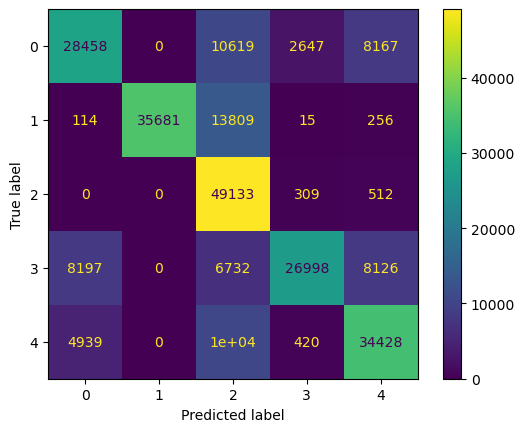

In [30]:
cm = confusion_matrix(y_test, predict, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()
plt.show()